# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset Amazon

In [2]:
amazon=pd.read_csv("../input/amazon-vs-flipkart-book-prices/amazon.csv")
amazon

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340
4,My Story,by Kamala Das,4.5,42.0,8172238975,178
...,...,...,...,...,...,...
1377,Geronimo Stilton and the Kingdom of Fantasy #8...,by Geronimo Stilton,4.6,329.0,9385887815,274
1378,Harry Potter and the Deathly Hallows (Harry Po...,by J.K. Rowling,4.6,352.0,1408855712,666
1379,Sita's Ramayana,by Samhita Arni,3.6,5.0,9380340036,542
1380,The Maze Runner #02 Scorch Trials Movie Tie-in,by James Dashner,3.9,56.0,9351039684,247


In [3]:
amazon.shape

(1382, 6)

In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   amazon_title          1382 non-null   object
 1   amazon_author         1382 non-null   object
 2   amazon_rating         1378 non-null   object
 3   amazon_reviews count  1378 non-null   object
 4   amazon_isbn-10        1382 non-null   int64 
 5   amazon_price          1382 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


# Data cleaning

In [5]:
amazon.isnull().sum()

amazon_title            0
amazon_author           0
amazon_rating           4
amazon_reviews count    4
amazon_isbn-10          0
amazon_price            0
dtype: int64

In [6]:
amazon=amazon.dropna(axis=0)

In [7]:
amazon.shape

(1378, 6)

In [8]:
amazon.isnull().sum()

amazon_title            0
amazon_author           0
amazon_rating           0
amazon_reviews count    0
amazon_isbn-10          0
amazon_price            0
dtype: int64

<AxesSubplot:>

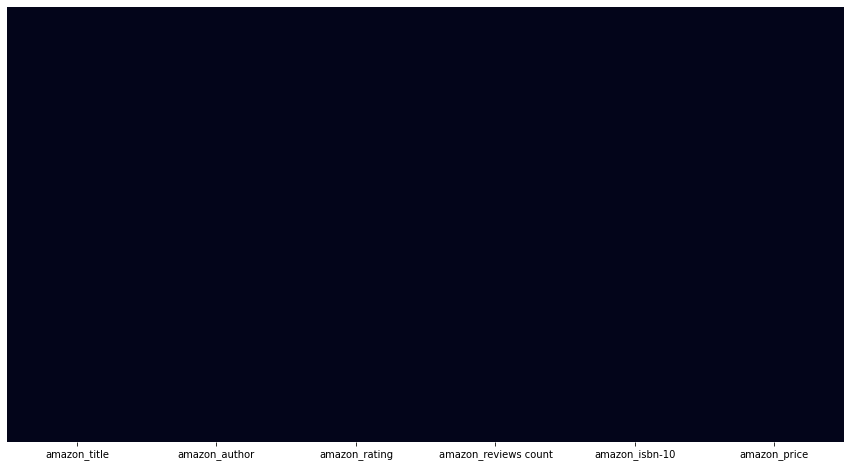

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(amazon.isnull(),cbar=False,yticklabels=False)

# Loading the Dataset Flipkart

In [10]:
flipkart=pd.read_csv("../input/amazon-vs-flipkart-book-prices/flipkart.csv")
flipkart.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


In [11]:
flipkart.shape

(1382, 6)

In [12]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flipkart_author         1382 non-null   object
 1   flipkart_isbn10         1382 non-null   int64 
 2   flipkart_title          1382 non-null   object
 3   flipkart_ratings count  1382 non-null   object
 4   flipkart_price          1382 non-null   int64 
 5   flipkart_stars          1382 non-null   object
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


# Data cleaning

In [13]:
flipkart.isnull().sum()

flipkart_author           0
flipkart_isbn10           0
flipkart_title            0
flipkart_ratings count    0
flipkart_price            0
flipkart_stars            0
dtype: int64

<AxesSubplot:>

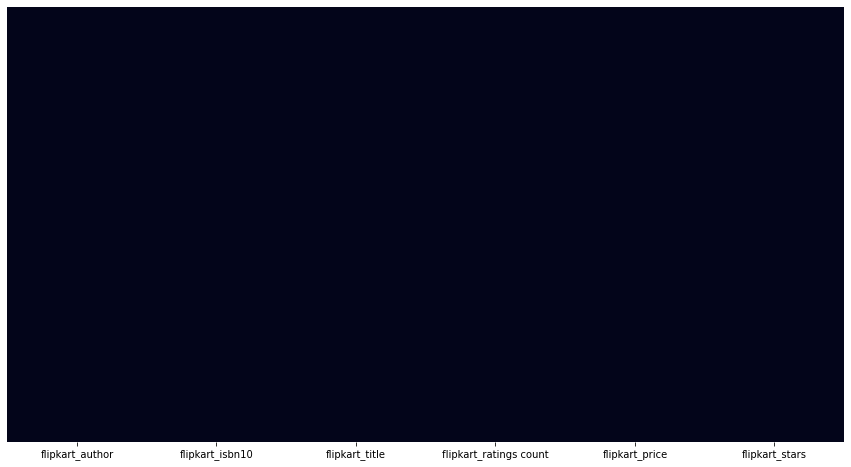

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(flipkart.isnull(),cbar=False,yticklabels=False)

# As both the Datasets (amazon and flipkart ) are cleaned lets analyze the Datasets

# Amazon

In [15]:
amazon.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340
4,My Story,by Kamala Das,4.5,42.0,8172238975,178


# Now we must convert "amazon_reviews count"  from string to numeric

In [16]:
amazon["amazon_reviews count"]=amazon["amazon_reviews count"].str.replace(",","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
amazon["amazon_reviews count"]=pd.to_numeric(amazon["amazon_reviews count"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
amazon.describe()

,amazon_reviews count,amazon_isbn-10,amazon_price
count,1378.000000,1.378000e+03,1378.000000
mean,492.148766,7.761269e+09,247.591437
std,1016.414262,2.641236e+09,151.274270
min,1.000000,1.250006e+09,1.000000
25%,41.000000,8.172235e+09,135.250000
50%,137.000000,8.192911e+09,213.000000
75%,392.500000,9.352865e+09,320.000000
max,6566.000000,9.960900e+09,895.000000


# Lets check the range of prices of every single book on Amazon

<AxesSubplot:xlabel='amazon_price', ylabel='Count'>

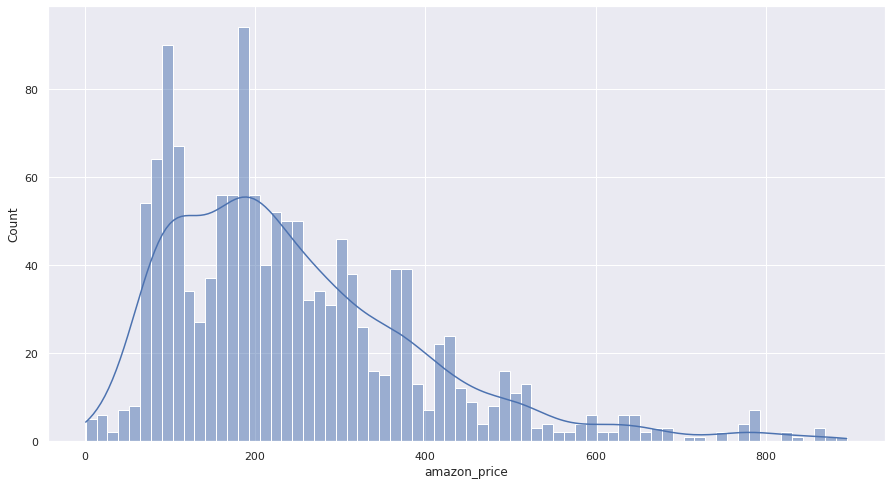

In [19]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon,x="amazon_price",kde=True, legend=True,bins=70)

# What does a right skewed distribution mean?
With right-skewed distribution(also known as "positively skewed" distribution), most data falls to the right, or positive side, of the graph's peak. Thus, the histogram skews in such a way that its right side (or "tail") is longer than its left side
The above visuals clearly states that the plot is rightly skewed which concludes that mean>meadian

# Lets check the reviews of every single book on Amazon

<AxesSubplot:xlabel='amazon_reviews count', ylabel='Count'>

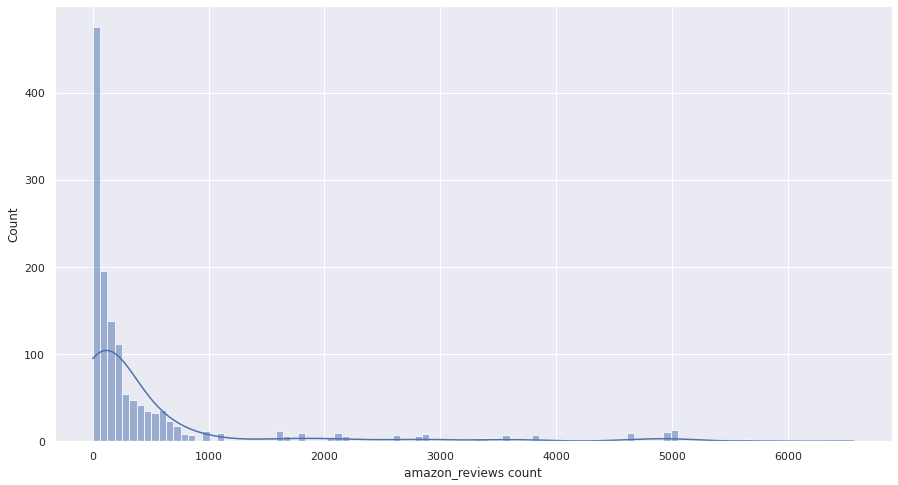

In [20]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon,x="amazon_reviews count",kde=True, legend=True)

# Lets check ratings on Amazon

In [21]:
amazon["amazon_rating"].value_counts()

4.4                   193
4.5                   155
4.3                   118
4.6                   118
4.1                   106
4.2                    98
4.7                    85
4.0                    63
4.8                    56
4.5 out of 5 stars     45
4.6 out of 5 stars     39
4.4 out of 5 stars     36
3.9                    35
5.0                    30
3.8                    27
3.7                    25
4.1 out of 5 stars     17
4.3 out of 5 stars     17
3.6                    16
4.9                    14
3.5                    13
3.4                    12
4.0 out of 5 stars     11
4.2 out of 5 stars     11
3.3                     8
4.7 out of 5 stars      7
3.6 out of 5 stars      6
5.0 out of 5 stars      3
3.0                     3
1.0                     3
3.1                     2
1.4                     2
3.2                     2
2.0                     1
2.4                     1
Name: amazon_rating, dtype: int64

# Coverting "amazon_rating" column from string to Integer format

In [22]:
def rating_impute(col):
    amazon_rating=col[0]
    if amazon_rating=="4.5 out of 5 stars":
        amazon_rating.replace("4.5 out of 5 stars","4.5")
    elif amazon_rating=="4.6 out of 5 stars":
        amazon_rating.replace("4.6 out of 5 stars","4.6")
    elif amazon_rating=="4.4 out of 5 stars":
        amazon_rating.replace("4.4 out of 5 stars","4.4")
    elif amazon_rating=="4.1 out of 5 stars":
        amazon_rating.replace("4.1 out of 5 stars","4.1")
    elif amazon_rating=="4.0 out of 5 stars":
        amazon_rating.replace("4.0 out of 5 stars","4.0")
    elif amazon_rating=="4.2 out of 5 stars":
        amazon_rating.replace("4.2 out of 5 stars","4.2")
    elif amazon_rating=="4.7 out of 5 stars":
        amazon_rating.replace("4.7 out of 5 stars","4.7")
    elif amazon_rating=="3.6 out of 5 stars":
        amazon_rating.replace("3.6 out of 5 stars","3.6")
    elif amazon_rating=="5.0 out of 5 stars":
        amazon_rating.replace("5.0 out of 5 stars","5.0")
    elif amazon_rating=="4.3 out of 5 stars":
        amazon_rating.replace("4.3 out of 5 stars","4.3")
    else:
        return amazon_rating

In [23]:
amazon["amazon_rating"]=  amazon[["amazon_rating"]].apply(rating_impute, axis=1)
amazon["amazon_rating"].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4.4    193
4.5    155
4.3    118
4.6    118
4.1    106
4.2     98
4.7     85
4.0     63
4.8     56
3.9     35
5.0     30
3.8     27
3.7     25
3.6     16
4.9     14
3.5     13
3.4     12
3.3      8
1.0      3
3.0      3
3.1      2
1.4      2
3.2      2
2.0      1
2.4      1
Name: amazon_rating, dtype: int64

# Values are coverted into Integer format

# Lets check the range of ratings of every single book on amazon

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='amazon_rating', ylabel='Count'>

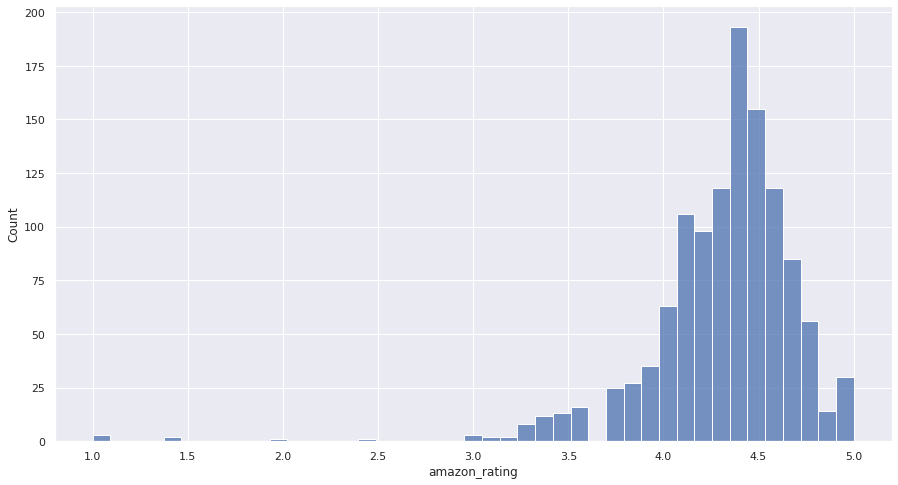

In [24]:
amazon["amazon_rating"]=pd.to_numeric(amazon["amazon_rating"])
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon,x="amazon_rating", legend=True)

# Most of the books has been rated in range of  3.0-5.0 

# Checking top 30 Author on Amazon

In [25]:
amazon.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340
4,My Story,by Kamala Das,4.5,42.0,8172238975,178


In [26]:
L1=list(amazon["amazon_author"].value_counts().keys()[0:30])
L2=list(amazon["amazon_author"].value_counts().values[0:30])

Text(0, 0.5, 'Authors on Amazon')

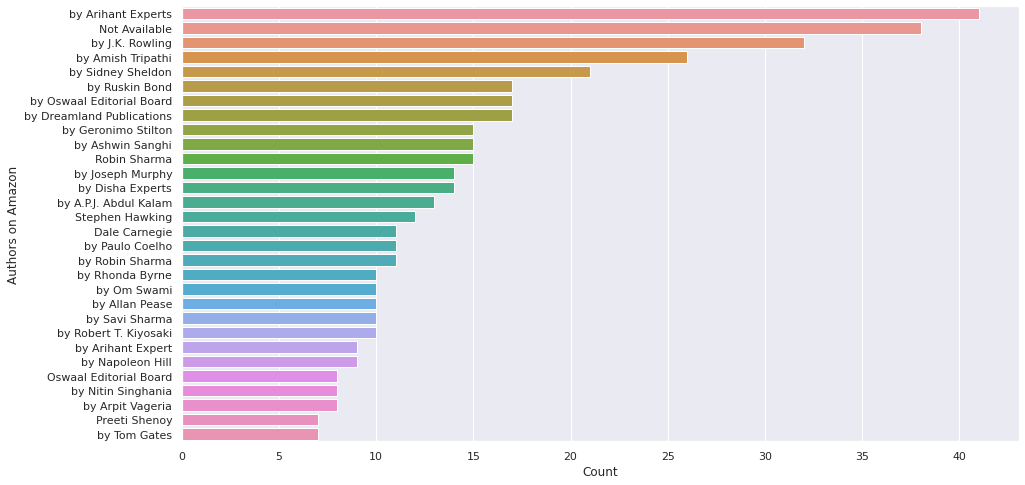

In [27]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=L2,y=L1,data=amazon)
plt.xlabel("Count")
plt.ylabel("Authors on Amazon")

# Flipkart 

In [28]:
flipkart.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


In [29]:
flipkart.describe()

,flipkart_isbn10,flipkart_price
count,1.382000e+03,1382.000000
mean,7.758529e+09,263.436324
std,2.643135e+09,210.164006
min,1.250006e+09,30.000000
25%,8.172235e+09,149.250000
50%,8.192911e+09,220.000000
75%,9.352865e+09,320.000000
max,9.960900e+09,5201.000000


# Lets check the range of prices of every single book on Flipkart

<AxesSubplot:xlabel='flipkart_price', ylabel='Count'>

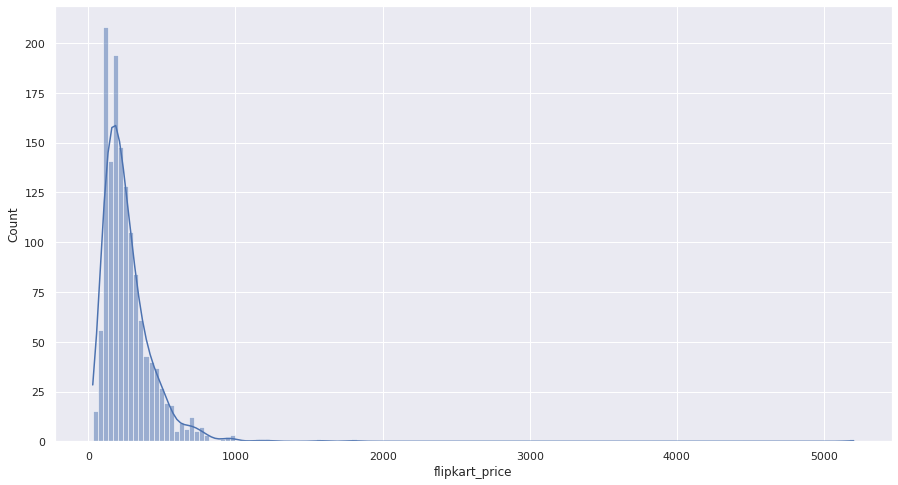

In [30]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart,x="flipkart_price",kde=True, legend=True,bins=150)

# As we can see most of the books lie in the range of 0-1000 (unit is not mentioned in Dataset) and very few lie in range of 1000-2000

# Lets check the ratings of every book on flipkart

In [31]:
flipkart["flipkart_stars"].value_counts()

4.5    350
4.4    319
4.3    207
4.6    197
4.2     92
4.7     57
4.8     36
4.1     34
4       25
        24
5       13
3.9     10
4.9      7
3.8      6
3        2
3.6      2
3.7      1
Name: flipkart_stars, dtype: int64

# Removing the rows from data having null "flipkart_stars" values

In [32]:
flipkart_1=flipkart[flipkart["flipkart_stars"]!=" "]

In [33]:
flipkart_1.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


# Now the Null values in column "flipkart_star" are being droped

In [34]:
flipkart_1["flipkart_stars"].value_counts()

4.5    350
4.4    319
4.3    207
4.6    197
4.2     92
4.7     57
4.8     36
4.1     34
4       25
5       13
3.9     10
4.9      7
3.8      6
3        2
3.6      2
3.7      1
Name: flipkart_stars, dtype: int64

# Converting the string values of "flipkart_stars" to interger

In [35]:
def stars_impute(col):
    flipkart_stars=col[0]
    if flipkart_stars==" 4":
        flipkart_stars.str.replace(" 4","4.0")
    elif flipkart_stars==" 5":
        flipkart_stars.str.replace(" 5","5.0")
    elif flipkart_stars==" 3":
        flipkart_stars.str.replace(" 3","3.0")
    else:
        return flipkart_stars

In [36]:
flipkart_1["flipkart_stars"]=flipkart_1[["flipkart_stars"]].apply( stars_impute,axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
flipkart_1["flipkart_stars"].value_counts()
flipkart_1["flipkart_stars"]=pd.to_numeric(flipkart_1["flipkart_stars"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Lets check the range of stars given to every single book on Flipkart

<AxesSubplot:xlabel='flipkart_stars', ylabel='Count'>

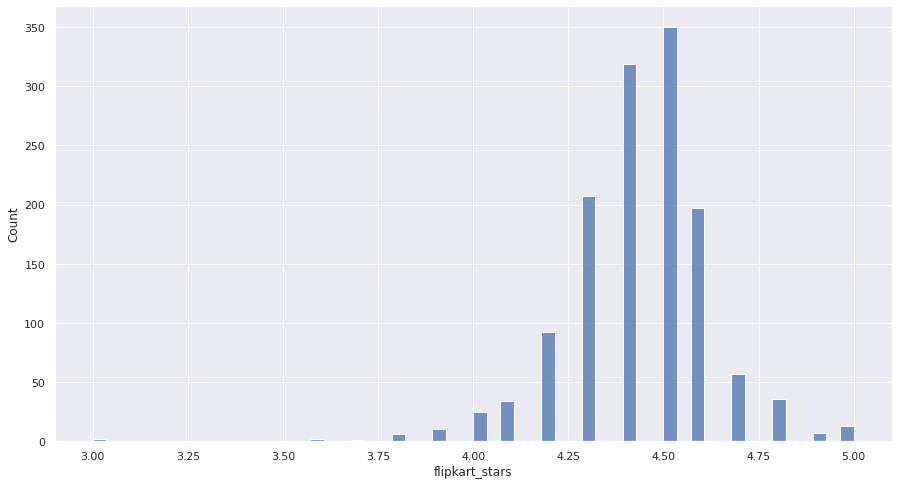

In [38]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart_1,x="flipkart_stars", legend=True)

# Checking top 30 Author on Flipkart

In [39]:
flipkart_1=flipkart_1[flipkart_1["flipkart_author"]!=" "]

In [40]:
L1=list(flipkart_1["flipkart_author"].value_counts().keys()[0:30])
L2=list(flipkart_1["flipkart_author"].value_counts().values[0:30])

Text(0, 0.5, 'Authors on flipkart')

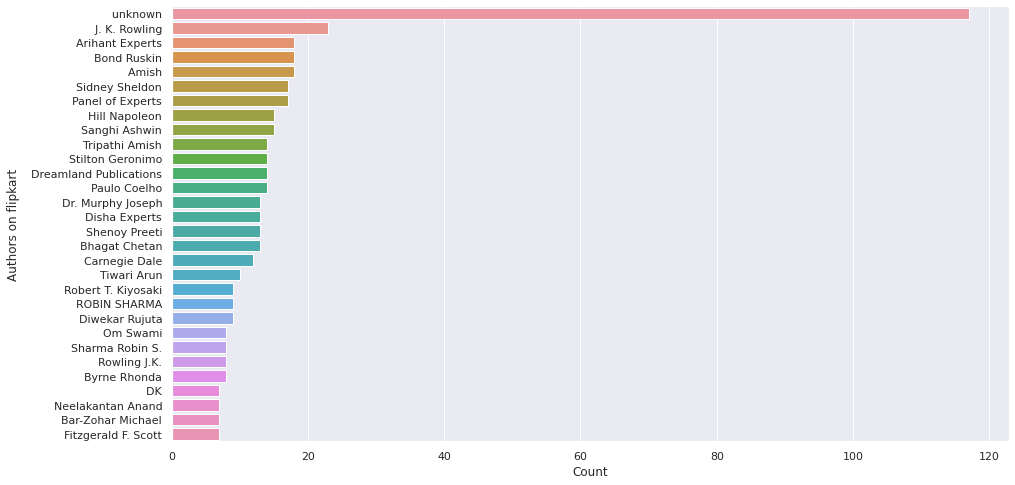

In [41]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=L2,y=L1,data=flipkart_1)
plt.xlabel("Count")
plt.ylabel("Authors on flipkart")

# Now lets merge both the Dataset and compare both the biggest E-commerce sites

In [42]:
amazon.head(1)

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209


In [43]:
flipkart_1.head(1)

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5


In [44]:
joint_data=amazon.merge(flipkart_1,left_on="amazon_isbn-10",right_on='flipkart_isbn10',how='inner')

In [45]:
joint_data.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
2,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
3,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
4,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5


# Lets Delete the duplicate records

In [46]:
joint_data_1=joint_data.drop_duplicates()
joint_data_1

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
36,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
45,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
94,My Story,by Kamala Das,4.5,42.0,8172238975,178,Kamala Das,8172238975,MY STORY,322,178,4.3
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,by A.P.J. Abdul Kalam,4.1,148.0,8170286840,120,Abdul Kalam A. P. J.,8170286840,Inspiring Thoughts,357,149,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4178,The Secret to Teen Power,by Paul Harrington,4.8,48.0,1847386938,492,Harrington Paul,1847386938,The Secret to Teen Power,207,373,4.5
4179,Harry Potter and the Deathly Hallows (Harry Po...,by J.K. Rowling,4.6,352.0,1408855712,666,J. K. Rowling,1408855712,Harry Potter and the Deathly Hallows,2083,452,4.7
4180,Sita's Ramayana,by Samhita Arni,3.6,5.0,9380340036,542,Arni Samhita,9380340036,Sita's Ramayana,19,550,4.1
4181,The Maze Runner #02 Scorch Trials Movie Tie-in,by James Dashner,3.9,56.0,9351039684,247,James Dashner,9351039684,The Scorch Trials,180,234,4.6


In [47]:
joint_data_1.shape

(682, 12)

# lets check percentage of null values

In [48]:
(joint_data_1.isnull().sum()/joint_data_1.shape[0])*100

amazon_title              0.000000
amazon_author             0.000000
amazon_rating             6.451613
amazon_reviews count      0.000000
amazon_isbn-10            0.000000
amazon_price              0.000000
flipkart_author           0.000000
flipkart_isbn10           0.000000
flipkart_title            0.000000
flipkart_ratings count    0.000000
flipkart_price            0.000000
flipkart_stars            0.000000
dtype: float64

<AxesSubplot:>

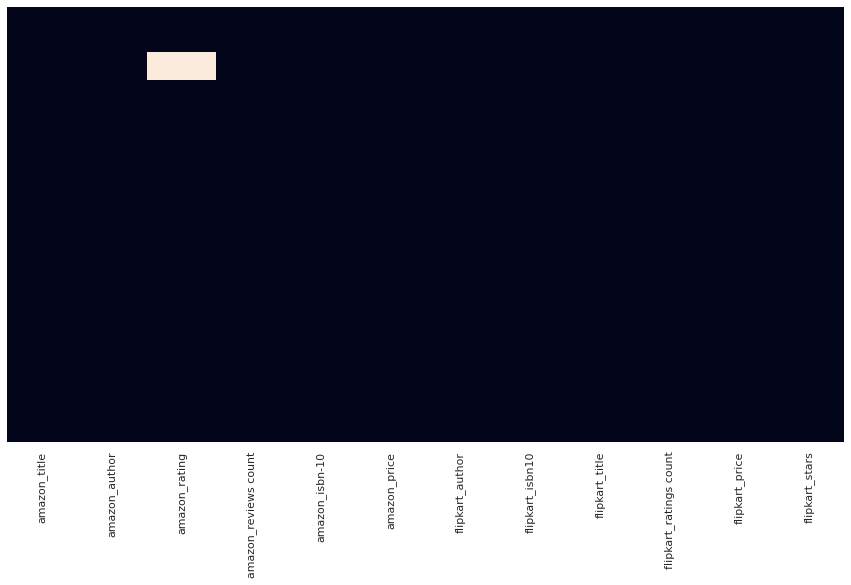

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(joint_data_1.isnull(),cbar=False,yticklabels=False)

# 6.5% is not negligible

# Lets clean our Dataset

In [50]:
joint_data_2=joint_data_1.dropna(axis=0)

# lets check percentage of null values

In [51]:
(joint_data_2.isnull().sum()/joint_data_1.shape[0])*100

amazon_title              0.0
amazon_author             0.0
amazon_rating             0.0
amazon_reviews count      0.0
amazon_isbn-10            0.0
amazon_price              0.0
flipkart_author           0.0
flipkart_isbn10           0.0
flipkart_title            0.0
flipkart_ratings count    0.0
flipkart_price            0.0
flipkart_stars            0.0
dtype: float64

<AxesSubplot:>

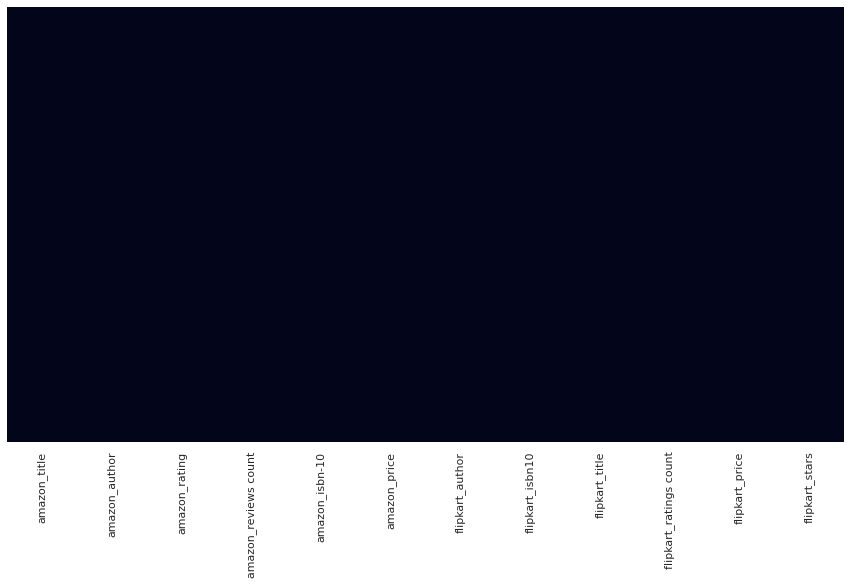

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(joint_data_2.isnull(),cbar=False,yticklabels=False)

In [53]:
joint_data_2

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
36,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
45,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
94,My Story,by Kamala Das,4.5,42.0,8172238975,178,Kamala Das,8172238975,MY STORY,322,178,4.3
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,by A.P.J. Abdul Kalam,4.1,148.0,8170286840,120,Abdul Kalam A. P. J.,8170286840,Inspiring Thoughts,357,149,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4178,The Secret to Teen Power,by Paul Harrington,4.8,48.0,1847386938,492,Harrington Paul,1847386938,The Secret to Teen Power,207,373,4.5
4179,Harry Potter and the Deathly Hallows (Harry Po...,by J.K. Rowling,4.6,352.0,1408855712,666,J. K. Rowling,1408855712,Harry Potter and the Deathly Hallows,2083,452,4.7
4180,Sita's Ramayana,by Samhita Arni,3.6,5.0,9380340036,542,Arni Samhita,9380340036,Sita's Ramayana,19,550,4.1
4181,The Maze Runner #02 Scorch Trials Movie Tie-in,by James Dashner,3.9,56.0,9351039684,247,James Dashner,9351039684,The Scorch Trials,180,234,4.6


# lets reshape our Dataset 

In [54]:
joint_data_3=joint_data_2.rename(columns={"amazon_title":"Book_title",
                                                                       "flipkart_author":"Book_Author",
                                                                        "flipkart_stars":"flipkart_rating",
                                                                     "flipkart_ratings count":"flipkart_reviews count"})

In [55]:
joint_data_4=joint_data_3.drop(["amazon_author","amazon_isbn-10","flipkart_isbn10","flipkart_title"],axis=1)

In [56]:
joint_data_4.head()

,Book_title,amazon_rating,amazon_reviews count,amazon_price,Book_Author,flipkart_reviews count,flipkart_price,flipkart_rating
0,Tell Me your Dreams,4.4,160.0,209,Sidney Sheldon,902,209,4.5
36,Romancing the Balance Sheet: For Anyone Who Ow...,4.5,156.0,477,Anil Lamba,352,477,4.5
45,Mossad,4.6,637.0,340,Bar-Zohar Michael,560,280,4.5
94,My Story,4.5,42.0,178,Kamala Das,322,178,4.3
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,4.1,148.0,120,Abdul Kalam A. P. J.,357,149,4.2


In [57]:
joint_data_5=joint_data_4[["Book_title","Book_Author","amazon_price","flipkart_price","amazon_rating","flipkart_rating","amazon_reviews count","flipkart_reviews count"]]

In [58]:
joint_data_5

,Book_title,Book_Author,amazon_price,flipkart_price,amazon_rating,flipkart_rating,amazon_reviews count,flipkart_reviews count
0,Tell Me your Dreams,Sidney Sheldon,209,209,4.4,4.5,160.0,902
36,Romancing the Balance Sheet: For Anyone Who Ow...,Anil Lamba,477,477,4.5,4.5,156.0,352
45,Mossad,Bar-Zohar Michael,340,280,4.6,4.5,637.0,560
94,My Story,Kamala Das,178,178,4.5,4.3,42.0,322
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,Abdul Kalam A. P. J.,120,149,4.1,4.2,148.0,357
...,...,...,...,...,...,...,...,...
4178,The Secret to Teen Power,Harrington Paul,492,373,4.8,4.5,48.0,207
4179,Harry Potter and the Deathly Hallows (Harry Po...,J. K. Rowling,666,452,4.6,4.7,352.0,2083
4180,Sita's Ramayana,Arni Samhita,542,550,3.6,4.1,5.0,19
4181,The Maze Runner #02 Scorch Trials Movie Tie-in,James Dashner,247,234,3.9,4.6,56.0,180


# Now as our Dataset is clean Lets analyze its

In [59]:
joint_data_5.describe()

,amazon_price,flipkart_price,amazon_rating,flipkart_rating,amazon_reviews count
count,638.000000,638.000000,638.000000,638.000000,638.000000
mean,266.576803,275.296238,4.273981,4.413480,213.815047
std,154.643022,173.420683,0.427449,0.215287,609.449094
min,1.000000,50.000000,1.000000,3.000000,1.000000
25%,159.250000,159.000000,4.100000,4.300000,23.000000
50%,230.000000,230.000000,4.300000,4.400000,62.500000
75%,347.750000,343.500000,4.500000,4.500000,180.000000
max,895.000000,1581.000000,5.000000,5.000000,6566.000000


# Amazon Prices Vs. Flipkart Prices

Text(0.5, 1.0, 'Amazon Prices Vs. Flipkart Prices')

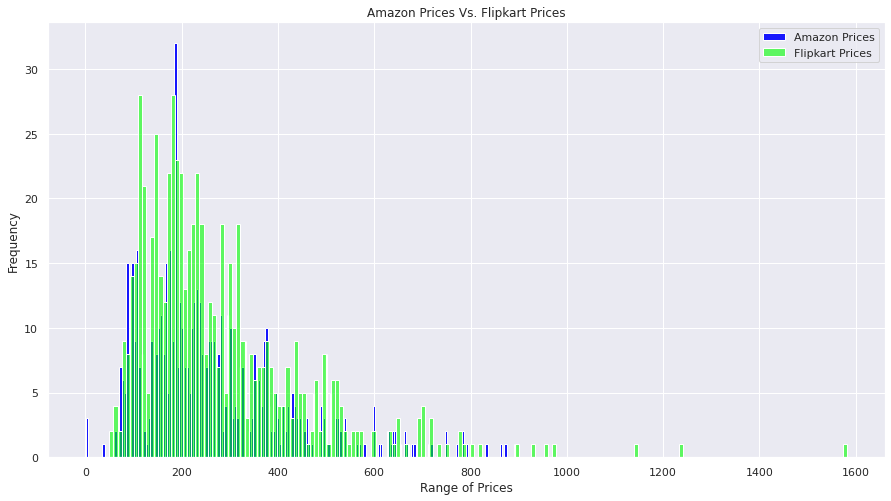

In [60]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
m = plt.hist(joint_data_5["amazon_price"],bins=180,fc = (0,0,1,0.9),label="Amazon Prices")
b = plt.hist(joint_data_5["flipkart_price"],bins=180,fc = (0,1,0,0.6),label = "Flipkart Prices")
plt.legend()
plt.xlabel("Range of Prices")
plt.ylabel("Frequency")
plt.title("Amazon Prices Vs. Flipkart Prices")

# From the above visuals we can conclude that the prices of books on Flipkart are slightly higher than that on Amazon

In [61]:
joint_data_5["flipkart_reviews count"]=pd.to_numeric(joint_data_5["flipkart_reviews count"])

In [62]:
joint_data_5.head()

,Book_title,Book_Author,amazon_price,flipkart_price,amazon_rating,flipkart_rating,amazon_reviews count,flipkart_reviews count
0,Tell Me your Dreams,Sidney Sheldon,209,209,4.4,4.5,160.0,902
36,Romancing the Balance Sheet: For Anyone Who Ow...,Anil Lamba,477,477,4.5,4.5,156.0,352
45,Mossad,Bar-Zohar Michael,340,280,4.6,4.5,637.0,560
94,My Story,Kamala Das,178,178,4.5,4.3,42.0,322
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,Abdul Kalam A. P. J.,120,149,4.1,4.2,148.0,357


# Amazon Ratings Vs. Flipkart Ratings

Text(0.5, 1.0, 'Amazon Ratings Vs. Flipkart Ratings')

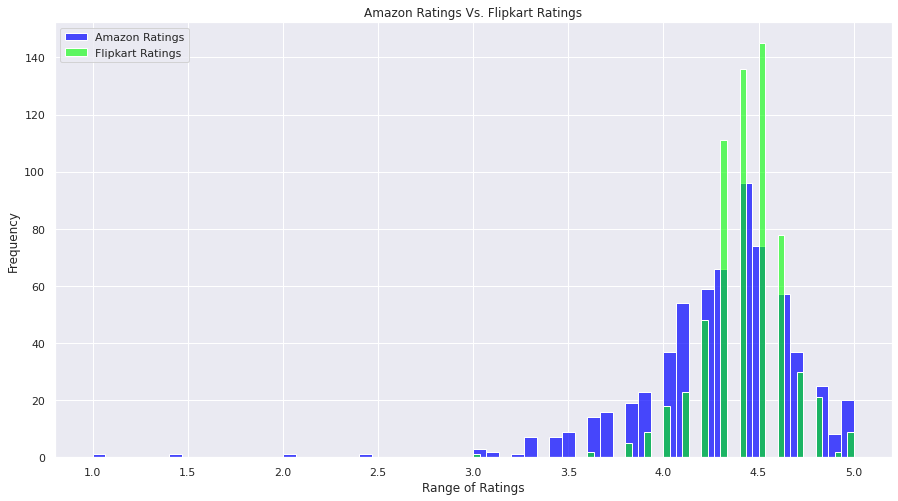

In [63]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
m = plt.hist(joint_data_5["amazon_rating"],bins=60,fc = (0,0,1,0.7),label="Amazon Ratings")
b = plt.hist(joint_data_5["flipkart_rating"],bins=60,fc = (0,1,0,0.6),label = "Flipkart Ratings")
plt.legend()
plt.xlabel("Range of Ratings")
plt.ylabel("Frequency")
plt.title("Amazon Ratings Vs. Flipkart Ratings")

# Visuals above clearly states that Flipkart has got better ratings than Amazon

# Amazon Reviews Vs. Flipkart Reviews

Text(0.5, 1.0, 'Amazon Reviews Vs. Flipkart Reviews')

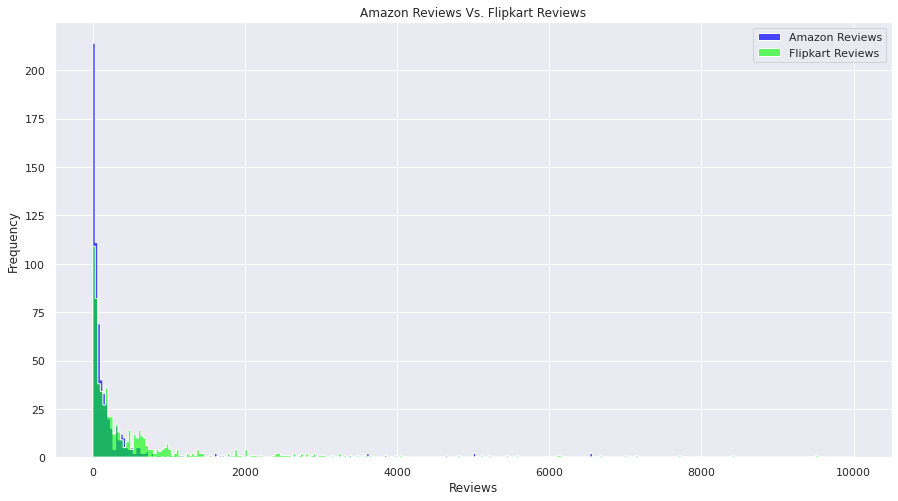

In [64]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
m = plt.hist(joint_data_5["amazon_reviews count"],bins=300,fc = (0,0,1,0.7),label="Amazon Reviews", histtype='stepfilled', range=[0,10000])
b = plt.hist(joint_data_5["flipkart_reviews count"],bins=300,fc = (0,1,0,0.6),label = "Flipkart Reviews", histtype='stepfilled', range=[0,10000])
plt.legend()
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title("Amazon Reviews Vs. Flipkart Reviews")

# As we can see Amazon has higher count for reviews below 1000 but Flipkart has greater count for reviews above 1000

In [65]:
joint_data_5.head()

,Book_title,Book_Author,amazon_price,flipkart_price,amazon_rating,flipkart_rating,amazon_reviews count,flipkart_reviews count
0,Tell Me your Dreams,Sidney Sheldon,209,209,4.4,4.5,160.0,902
36,Romancing the Balance Sheet: For Anyone Who Ow...,Anil Lamba,477,477,4.5,4.5,156.0,352
45,Mossad,Bar-Zohar Michael,340,280,4.6,4.5,637.0,560
94,My Story,Kamala Das,178,178,4.5,4.3,42.0,322
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,Abdul Kalam A. P. J.,120,149,4.1,4.2,148.0,357


# Flipkart ratings Vs. Flipkart prices

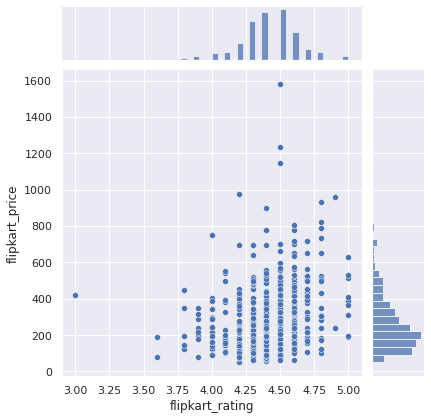

In [66]:
sns.set(style="darkgrid")
sns.jointplot(x="flipkart_rating",y="flipkart_price",data=joint_data_5)

# Books rated between 4.25-4.75 are the most expensive books on Flipkart 

# Amazon ratings Vs. Amazon prices

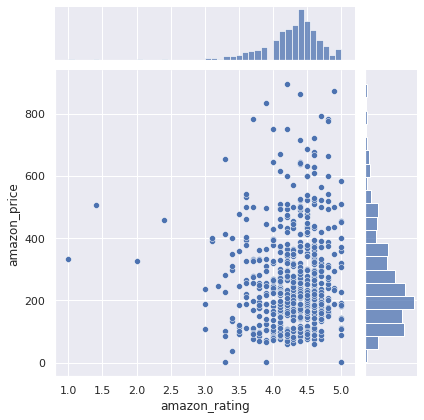

In [67]:
sns.set(style="darkgrid")
sns.jointplot(x="amazon_rating",y="amazon_price",data=joint_data_5)

# Books rated between 3.50-4.75 are the most expensive books on Amazon 